In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
SIMULATION_OUTPUT="/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project"

In [3]:
import pandas as pd
from pathlib import Path
import itertools

In [4]:
#results are in individual files
chunks_list=range(10)
RELATIVE_FILE_PATHS=[f"results/output_lcadc_mixed_reset_neural_{i}.simplified.vcsv"
                     for i in chunks_list]

In [5]:
filepaths = [Path(SIMULATION_OUTPUT)/filepath for filepath in RELATIVE_FILE_PATHS]
filepaths

[PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_mixed_reset_neural_0.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_mixed_reset_neural_1.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_mixed_reset_neural_2.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_mixed_reset_neural_3.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_mixed_reset_neural_4.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_mixed_reset_neural_5.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_mixed_reset_neural_6.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/Maest

In [6]:
def get_df(filepath, header):
    df = pd.read_csv(filepath, comment=';', header=None, 
                 names=header)
    return df[header].copy()

In [7]:
df_list = []
header = ["time", "values"]
for filepath, chunks in zip(filepaths, chunks_list):
    df_list.append(get_df(filepath,header))
df_list

[           time    values
 0      0.000000  0.000000
 1      0.000006 -0.004687
 2      0.000053  0.000000
 3      0.000094 -0.004687
 4      0.000111 -0.009375
 ...         ...       ...
 25769  0.998886  0.000000
 25770  0.998902 -0.004687
 25771  0.998931  0.000000
 25772  0.998947  0.004687
 25773  0.998950  0.000000
 
 [25774 rows x 2 columns],
            time    values
 0      0.000000  0.000000
 1      0.000006  0.004687
 2      0.000078  0.000000
 3      0.000094 -0.004687
 4      0.000127  0.000000
 ...         ...       ...
 25717  0.999623  0.000000
 25718  0.999633  0.004687
 25719  0.999634  0.000000
 25720  0.999647  0.004687
 25721  0.999739  0.000000
 
 [25722 rows x 2 columns],
            time    values
 0      0.000000  0.000000
 1      0.000006 -0.004687
 2      0.000007  0.000000
 3      0.000136  0.004687
 4      0.000201  0.000000
 ...         ...       ...
 25680  0.994318  0.009375
 25681  0.994326  0.004687
 25682  0.994337  0.000000
 25683  0.994349 -0.0046

In [8]:
#come from 7_Export_signals
start_times=[ 0.0,
 0.99915,
 1.999,
 2.9937,
 3.99875,
 4.99575,
 5.9998,
 6.98785,
 8.0024,
 8.99575 ]

end_times=[0.9991,
 0.9998,
 0.99465,
 1.005,
 0.9969500000000004,
 1.0039999999999996,
 0.9880000000000004,
 1.0145,
 0.9932999999999996,
 1.0042000000000009]

In [9]:
rounded_end_times=[round(end_time,5) for end_time in end_times]

In [10]:
def process_df(df,t_start,t_end,delay):
    ndf = df.copy()
    ndf["time"]=ndf["time"]-delay
    ndf["time"]=ndf["time"]+ t_start
    return ndf.loc[(ndf["time"]>=t_start) & (ndf["time"]<t_end)]

In [11]:
import numpy as np

In [12]:
list_df_chunks = []
delay = 6e-6
n_end_times=start_times[1:]+[start_times[-1]+rounded_end_times[-1]]
for i, cdf in enumerate(df_list):
    ndf = process_df(cdf,start_times[i],n_end_times[i],delay)
    list_df_chunks.append(ndf)
list_df_chunks

[               time    values
 1      9.880810e-08 -0.004687
 2      4.704238e-05  0.000000
 3      8.780523e-05 -0.004687
 4      1.053915e-04 -0.009375
 5      1.095223e-04  0.000000
 ...             ...       ...
 25769  9.988798e-01  0.000000
 25770  9.988959e-01 -0.004687
 25771  9.989249e-01  0.000000
 25772  9.989412e-01  0.004687
 25773  9.989436e-01  0.000000
 
 [25773 rows x 2 columns],
            time    values
 1      0.999150  0.004687
 2      0.999222  0.000000
 3      0.999238 -0.004687
 4      0.999271  0.000000
 5      0.999281  0.004687
 ...         ...       ...
 25717  1.998767  0.000000
 25718  1.998777  0.004687
 25719  1.998778  0.000000
 25720  1.998791  0.004687
 25721  1.998883  0.000000
 
 [25721 rows x 2 columns],
            time    values
 1      1.999000 -0.004687
 2      1.999001  0.000000
 3      1.999130  0.004687
 4      1.999195  0.000000
 5      1.999261 -0.004687
 ...         ...       ...
 25680  2.993312  0.009375
 25681  2.993320  0.004687
 25

In [13]:
rdf = pd.concat(list_df_chunks)

In [14]:
from eapprocessor.tools.resample import resample, decimate

In [31]:
fs = 20e3*128
t_start=np.array(rdf["time"])[0]
t_stop=np.array(rdf["time"])[-1]
x = np.arange(t_start, t_stop, 1/fs)
y = resample(rdf["time"], rdf["values"],x,1)

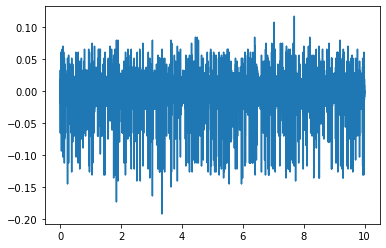

In [32]:
plt.plot(x,y)

In [33]:
d_time,d_signal= decimate(x, y,16)
d_time,d_signal= decimate(d_time, d_signal,8)

In [34]:
import matplotlib.pyplot as plt

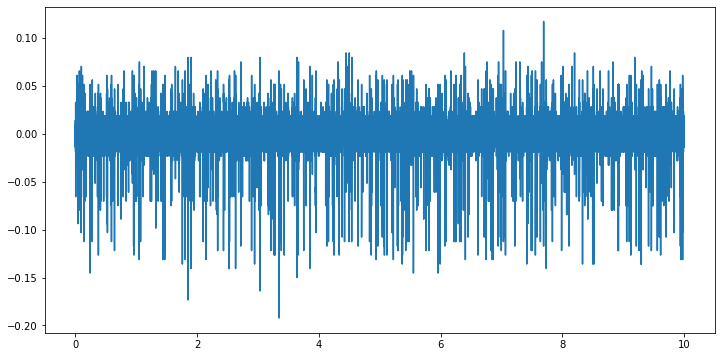

In [35]:
fig= plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(rdf["time"],rdf["values"])

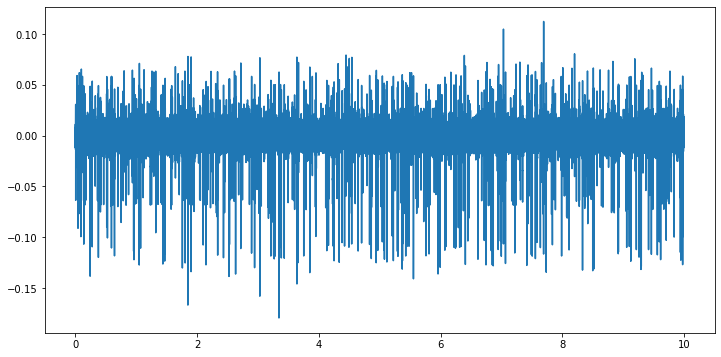

In [36]:
fig= plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(d_time,d_signal[:-1])

In [37]:
BASE_PATH = "/mnt/Data/data"
base_dir = Path(BASE_PATH).resolve()

config = {
    "config_folder": "../data/mearec",
    "recordings_folder": str(base_dir / "output/recordings"),
    "templates_folder": str(base_dir / "output/templates")
}
channel_indexes=[21,27]
fs_list = [24000, 20000, 16000]
noise_levels = [5, 10, 15, 25]
nthresholds = 50

In [38]:
from eapprocessor.mearec.api import generate_templates, generate_recordings, load_recordings

In [40]:
all_recgen_list = [[load_recordings(datafolder=config["recordings_folder"],
                verbose=True, noise_level=noise_level, fs=fs) for noise_level in noise_levels]
               for fs in fs_list]
recordings_20khz = all_recgen_list[1]
recgen=recordings_20khz[0]

Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_5uV_24000Hz_2021-12-02_10-59.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_10uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_15uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_25uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_5uV_20000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_10uV_20000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Da

In [41]:
recordings = recgen.recordings[:].T
timestamps = np.array(recgen.timestamps)

selected = recordings[channel_indexes[1]]
odf = pd.DataFrame({"time":timestamps,"vout":selected})

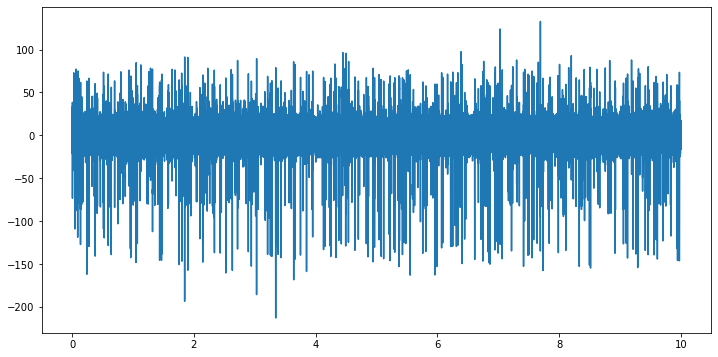

In [42]:
fig= plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(odf["time"],odf["vout"])

In [43]:
from eapprocessor.tools.fft import fft

In [44]:
Fs=20e3

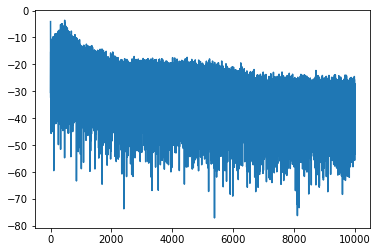

In [47]:
xf, yf = fft(np.array(odf["vout"]), Fs)
plt.plot(xf,10*np.log10(np.power(yf,2)))

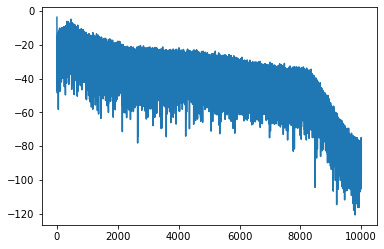

In [48]:
xf1, yf1 = fft(d_signal*1000, Fs)
plt.plot(xf1,10*np.log10(np.power(yf1,2)))

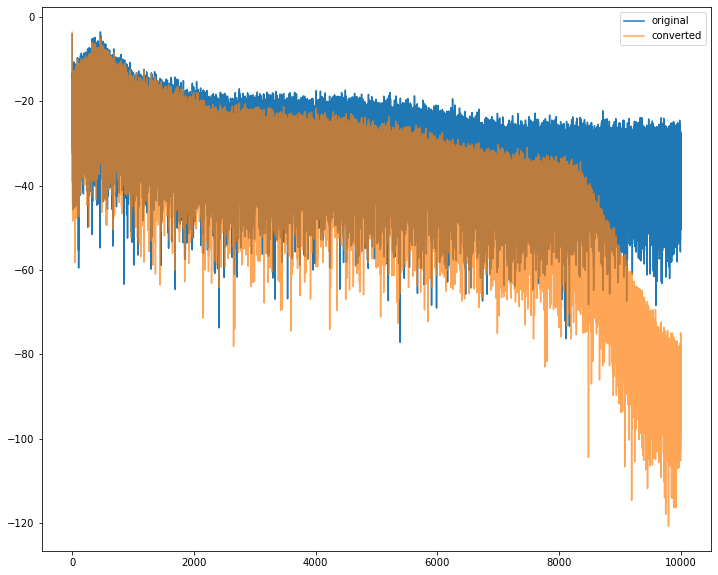

In [49]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
ax.plot(xf,10*np.log10(np.power(yf,2)), label="original")
ax.plot(xf1,10*np.log10(np.power(yf1,2)), label="converted",alpha=0.7)
ax.legend()